#Trainieren des GCN-Models für Loan-Datensatz - Aktivitäts-basiert

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path
# Hauptordner-Pfad
path = Path("/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM")
%cd "/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM"

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM


In [ ]:
%%capture
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-geometric==1.7.2


In [ ]:
%%capture
!pip install dive-into-graphs

In [ ]:
%%capture
!pip install pm4py

In [ ]:
import torch
import joblib
from torch_geometric.data import DataLoader
from dig.xgraph.dataset import BA_LRP

from models.gcn3_neu import *
 

# Module für das Preprocessing der verwendeten Datensätze
from preprocessing.loanApplication import *
from preprocessing.reviewSynthetic import *
from train_gcn import Train_GCN

In [ ]:
# Verwendete Laufzeit-Umgebung definieren (GPU oder CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Datensatz laden

In [ ]:
dataset_name = "review_sn_f3_ohe_2" # "loan_sn_f2_ohe_wEvents_4"
dataset = torch.load(path / str("datasets/dataset_"+ dataset_name))
feature  = joblib.load("datasets/encoder_" + dataset_name + ".joblib")
mol_dataset_train = False

In [ ]:
# Split Datasets in Train, Test und Validation Dataset
torch.manual_seed(33)    # Damit gleich gesplittet wird

size = len(dataset)
split1 = int(0.7*len(dataset))
split2 = int(0.9*len(dataset))

dataset = dataset.shuffle()   # Mischen

ds_train = dataset[:split1]
ds_val = dataset[split1:split2]
ds_test = dataset[split2:]


In [ ]:
# Dataloader erstellen
batch_size= 100
train_loader = DataLoader(ds_train, batch_size=batch_size)
val_loader = DataLoader(ds_val, batch_size=batch_size)
test_loader = DataLoader(ds_test, batch_size=batch_size)

## Modelle initialisieren

In [ ]:
# GCN initialisieren
# Model Variablen
hidden_channel = 100
num_layer = 3
input_dim = dataset.num_features


## Parameter Tuning

In [ ]:
from utilities_parameter_tuning import save_plots, save_hyperparam, create_run, run_tuning

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/review_sn_f3_ohe_2/run_1
save Hyperparameter
Epoch: 001, Train Acc: 0.7964, Validation Acc: 0.8020, Loss Training: 0.4762, Loss Validation: 0.4710
Epoch: 002, Train Acc: 0.9867, Validation Acc: 0.9840, Loss Training: 0.0585, Loss Validation: 0.0781
Epoch: 003, Train Acc: 0.9909, Validation Acc: 0.9865, Loss Training: 0.0477, Loss Validation: 0.0657
Epoch: 004, Train Acc: 0.9937, Validation Acc: 0.9890, Loss Training: 0.0306, Loss Validation: 0.0427
Epoch: 005, Train Acc: 0.9957, Validation Acc: 0.9915, Loss Training: 0.0447, Loss Validation: 0.0606
Epoch: 006, Train Acc: 0.9966, Validation Acc: 0.9925, Loss Training: 0.0207, Loss Validation: 0.0294
Epoch: 007, Train Acc: 0.9966, Validation Acc: 0.9930, Loss Training: 0.0074, Loss Validation: 0.0278
Epoch: 008, Train Acc: 0.9954, Validation Acc: 0.9910, Loss Training: 0.0278, Loss Validation: 0.0529
Epoch: 009, Train Acc: 0.9996, Validation Acc: 0.9970, Loss Training: 0.0

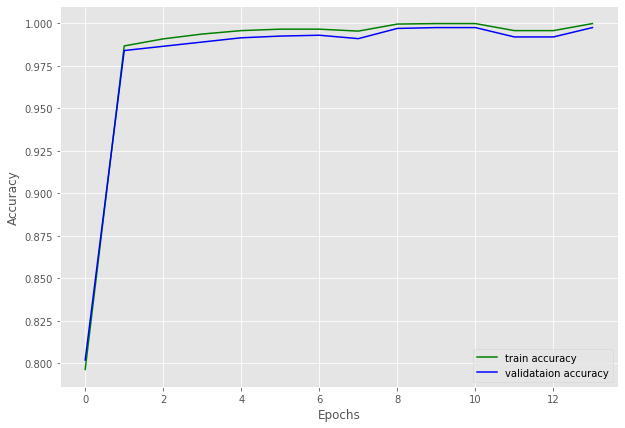

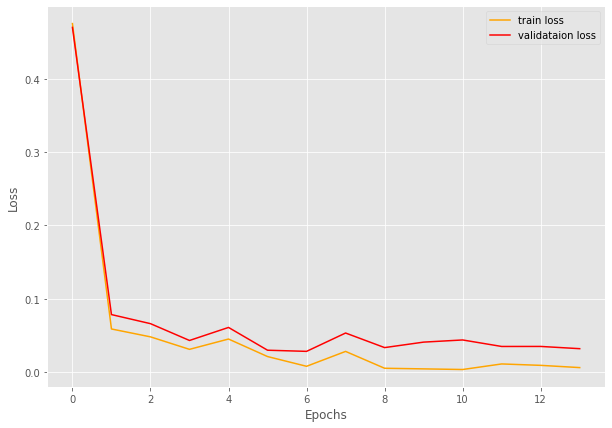

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.05, "num_epochs": 15}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/review_sn_f3_ohe_2/run_2
save Hyperparameter
Epoch: 001, Train Acc: 0.7659, Validation Acc: 0.7755, Loss Training: 0.4792, Loss Validation: 0.4792
Epoch: 002, Train Acc: 0.8077, Validation Acc: 0.8105, Loss Training: 0.3902, Loss Validation: 0.3934
Epoch: 003, Train Acc: 0.8694, Validation Acc: 0.8645, Loss Training: 0.3003, Loss Validation: 0.3038
Epoch: 004, Train Acc: 0.9430, Validation Acc: 0.9420, Loss Training: 0.1693, Loss Validation: 0.1734
Epoch: 005, Train Acc: 0.9999, Validation Acc: 0.9980, Loss Training: 0.0361, Loss Validation: 0.0400
Epoch: 006, Train Acc: 0.9999, Validation Acc: 0.9980, Loss Training: 0.0075, Loss Validation: 0.0140
Epoch: 007, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0055, Loss Validation: 0.0173
Epoch: 008, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0023, Loss Validation: 0.0142
Epoch: 009, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0

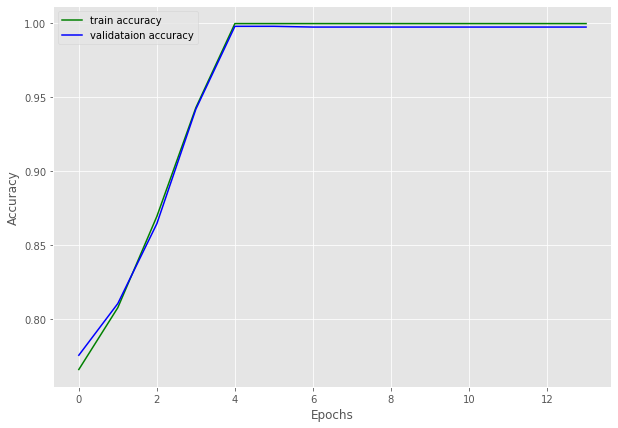

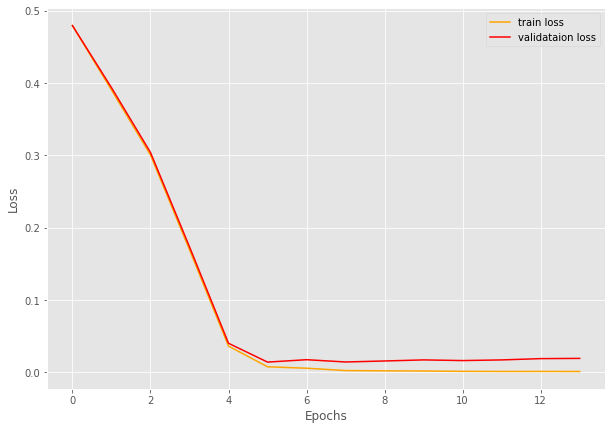

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.001, "num_epochs": 15}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/review_sn_f3_ohe_2/run_3
save Hyperparameter
Epoch: 001, Train Acc: 0.8477, Validation Acc: 0.8560, Loss Training: 0.3136, Loss Validation: 0.3108
Epoch: 002, Train Acc: 0.9999, Validation Acc: 0.9980, Loss Training: 0.0011, Loss Validation: 0.0217
Epoch: 003, Train Acc: 0.9999, Validation Acc: 0.9980, Loss Training: 0.0009, Loss Validation: 0.0270
Epoch: 004, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0010, Loss Validation: 0.0284
Epoch: 005, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0009, Loss Validation: 0.0340
Epoch: 006, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0009, Loss Validation: 0.0304
Epoch: 007, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0008, Loss Validation: 0.0384
Epoch: 008, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0008, Loss Validation: 0.0344
Epoch: 009, Train Acc: 0.9999, Validation Acc: 0.9975, Loss Training: 0.0

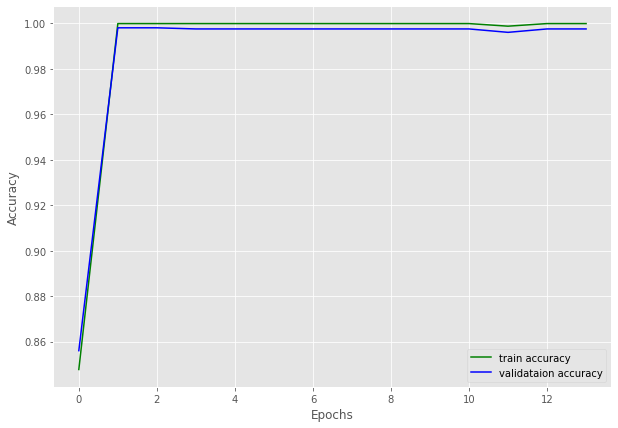

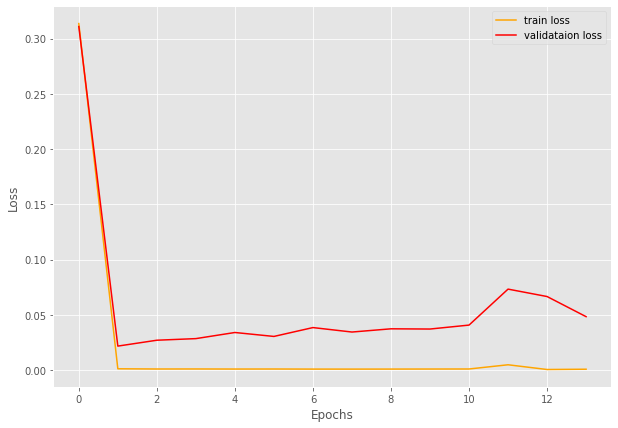

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.005, "num_epochs": 15}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/review_sn_f3_ohe_2/run_4
save Hyperparameter
Epoch: 001, Train Acc: 0.4936, Validation Acc: 0.4865, Loss Training: 0.6921, Loss Validation: 0.6923
Epoch: 002, Train Acc: 0.7517, Validation Acc: 0.7675, Loss Training: 0.6883, Loss Validation: 0.6883
Epoch: 003, Train Acc: 0.7824, Validation Acc: 0.7815, Loss Training: 0.6757, Loss Validation: 0.6758
Epoch: 004, Train Acc: 0.7557, Validation Acc: 0.7525, Loss Training: 0.6396, Loss Validation: 0.6402
Epoch: 005, Train Acc: 0.7527, Validation Acc: 0.7530, Loss Training: 0.5580, Loss Validation: 0.5584
Epoch: 006, Train Acc: 0.7503, Validation Acc: 0.7520, Loss Training: 0.4801, Loss Validation: 0.4813
Epoch: 007, Train Acc: 0.7681, Validation Acc: 0.7680, Loss Training: 0.4443, Loss Validation: 0.4475
Epoch: 008, Train Acc: 0.7706, Validation Acc: 0.7685, Loss Training: 0.4252, Loss Validation: 0.4292
Epoch: 009, Train Acc: 0.7759, Validation Acc: 0.7740, Loss Training: 0.4

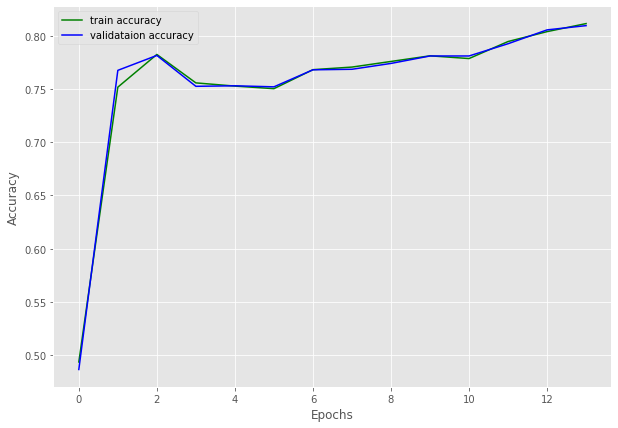

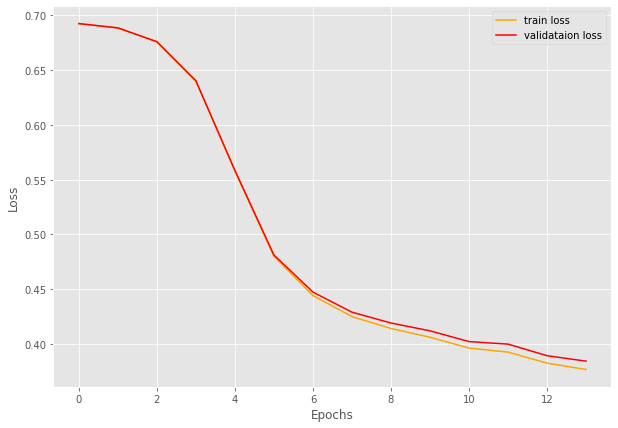

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.0001, "num_epochs": 15}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/review_sn_f3_ohe_2/run_5
save Hyperparameter
Epoch: 001, Train Acc: 0.7354, Validation Acc: 0.7330, Loss Training: 0.6593, Loss Validation: 0.6587
Epoch: 002, Train Acc: 0.7803, Validation Acc: 0.7850, Loss Training: 0.4415, Loss Validation: 0.4418
Epoch: 003, Train Acc: 0.8004, Validation Acc: 0.8050, Loss Training: 0.3916, Loss Validation: 0.3952
Epoch: 004, Train Acc: 0.8417, Validation Acc: 0.8445, Loss Training: 0.3484, Loss Validation: 0.3512
Epoch: 005, Train Acc: 0.8734, Validation Acc: 0.8675, Loss Training: 0.2892, Loss Validation: 0.2924
Epoch: 006, Train Acc: 0.9149, Validation Acc: 0.9140, Loss Training: 0.2251, Loss Validation: 0.2289
Epoch: 007, Train Acc: 0.9540, Validation Acc: 0.9515, Loss Training: 0.1522, Loss Validation: 0.1541
Epoch: 008, Train Acc: 0.9964, Validation Acc: 0.9960, Loss Training: 0.0755, Loss Validation: 0.0792
Epoch: 009, Train Acc: 0.9999, Validation Acc: 0.9980, Loss Training: 0.0

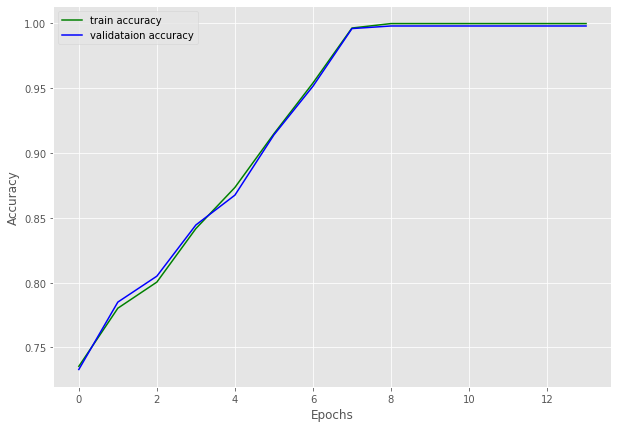

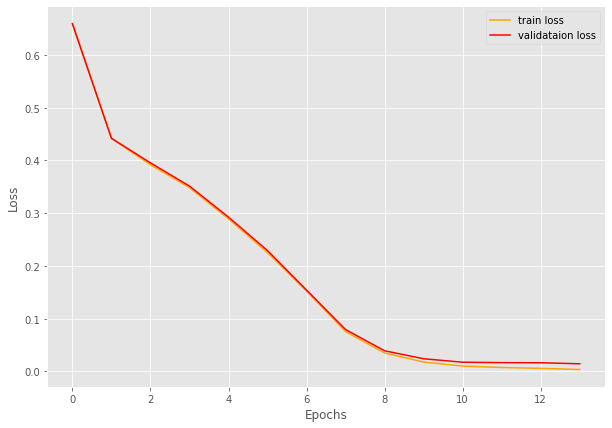

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.0005, "num_epochs": 15}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/review_sn_f3_ohe_2/run_6
save Hyperparameter
Epoch: 001, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6929, Loss Validation: 0.6927
Epoch: 002, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6927, Loss Validation: 0.6926
Epoch: 003, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6926, Loss Validation: 0.6924
Epoch: 004, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6925, Loss Validation: 0.6923
Epoch: 005, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6923, Loss Validation: 0.6921
Epoch: 006, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6922, Loss Validation: 0.6920
Epoch: 007, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6920, Loss Validation: 0.6918
Epoch: 008, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6918, Loss Validation: 0.6916
Epoch: 009, Train Acc: 0.5064, Validation Acc: 0.5135, Loss Training: 0.6

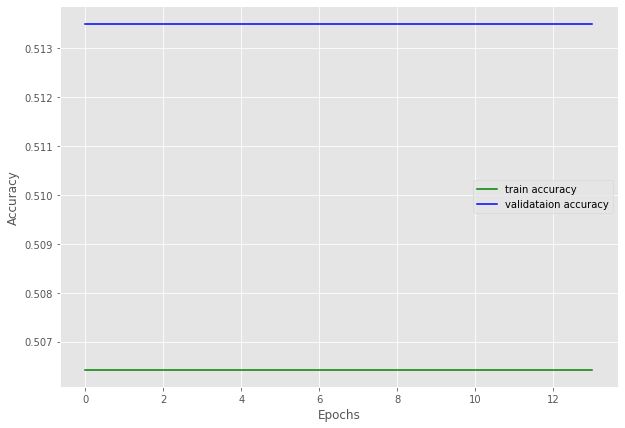

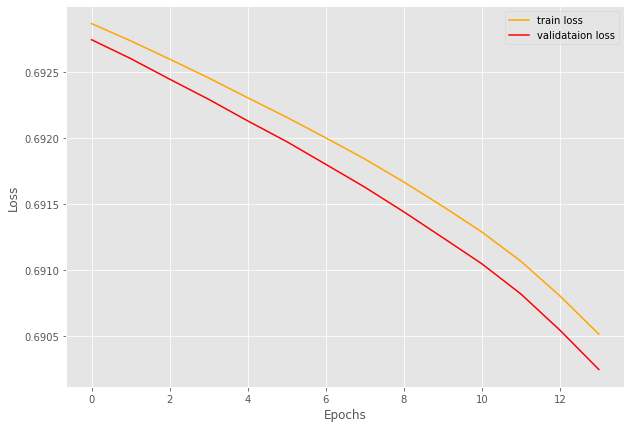

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.00001, "num_epochs": 15}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/review_sn_f3_ohe_2/run_7
save Hyperparameter
Epoch: 001, Train Acc: 0.4936, Validation Acc: 0.4865, Loss Training: 0.6942, Loss Validation: 0.6949
Epoch: 002, Train Acc: 0.4936, Validation Acc: 0.4865, Loss Training: 0.6918, Loss Validation: 0.6922
Epoch: 003, Train Acc: 0.5184, Validation Acc: 0.5070, Loss Training: 0.6890, Loss Validation: 0.6893
Epoch: 004, Train Acc: 0.7357, Validation Acc: 0.7300, Loss Training: 0.6844, Loss Validation: 0.6845
Epoch: 005, Train Acc: 0.7610, Validation Acc: 0.7600, Loss Training: 0.6758, Loss Validation: 0.6759
Epoch: 006, Train Acc: 0.7563, Validation Acc: 0.7575, Loss Training: 0.6601, Loss Validation: 0.6603
Epoch: 007, Train Acc: 0.7534, Validation Acc: 0.7605, Loss Training: 0.6347, Loss Validation: 0.6350
Epoch: 008, Train Acc: 0.7494, Validation Acc: 0.7555, Loss Training: 0.5984, Loss Validation: 0.5988
Epoch: 009, Train Acc: 0.7496, Validation Acc: 0.7525, Loss Training: 0.5

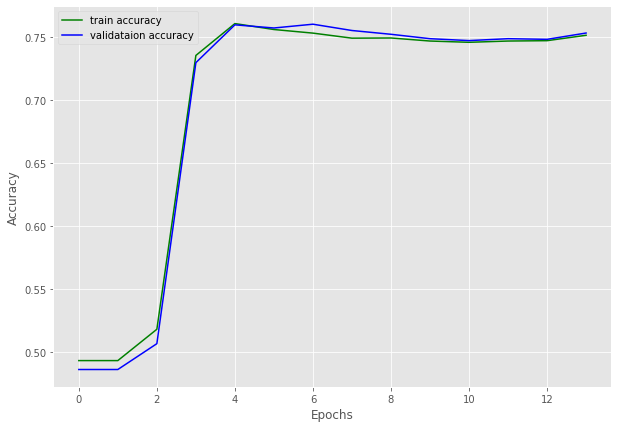

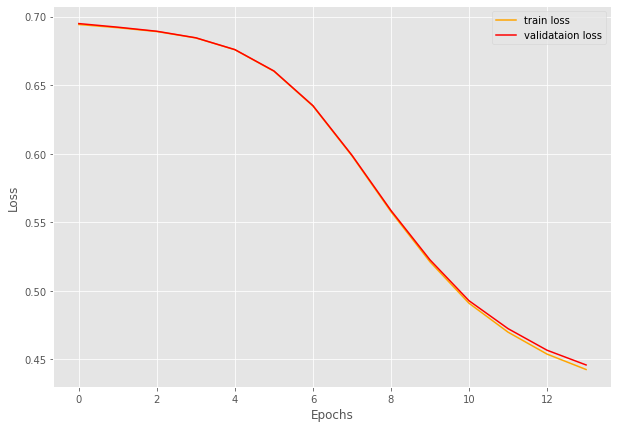

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.00005, "num_epochs": 15}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

## Training ausführen

In [ ]:
num_epochs = 50

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

train_results = []
gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
training = Train_GCN(gcn_model, device, lr = 0.001)


for epoch in range(1, num_epochs):
    _ = training.train(train_loader)
    train_loss, train_acc = training.test(train_loader)
    val_loss, val_acc = training.test(val_loader)
    train_results.append([epoch, train_acc, val_acc, train_loss, val_loss])
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Validation Acc: {val_acc:.4f}, Loss train: {train_loss}, Loss val: {val_loss}')
test_acc = training.test(test_loader)
train_results.append(test_acc)


<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.7683, Validation Acc: 0.7740, Loss train: 0.4768797027213233, Loss val: 0.4764180392026901
Epoch: 002, Train Acc: 0.8240, Validation Acc: 0.8270, Loss train: 0.3725323545081275, Loss val: 0.3753276735544205
Epoch: 003, Train Acc: 0.8823, Validation Acc: 0.8785, Loss train: 0.2589497006365231, Loss val: 0.25931624621152877
Epoch: 004, Train Acc: 0.9784, Validation Acc: 0.9805, Loss train: 0.10551647703562464, Loss val: 0.10778957903385163
Epoch: 005, Train Acc: 0.9999, Validation Acc: 0.9980, Loss train: 0.020951009927583593, Loss val: 0.02685982151888311
Epoch: 006, Train Acc: 0.9999, Validation Acc: 0.9980, Loss train: 0.006460072665608355, Loss val: 0.01469658528221771
Epoch: 007, Train Acc: 0.9999, Validation Acc: 0.9980, Loss train: 0.004444315108204527, Loss val: 0.01597864624345675
Epoch: 008, Train Acc: 0.9999, Validation Acc: 0.9980, Loss train: 0.002517964877188206, Loss val: 0.01485837461950723
Epoch: 009, Train Acc: 0.9999, Validation Acc: 0.9975, Lo

In [ ]:
torch.save(gcn_model.state_dict(), path / str("models/model_" + dataset_name))
joblib.dump(train_results, "models/results_" + dataset_name + ".joblib")

['models/results_review_sn_f3_ohe_2.joblib']